#  Medical Cost Personal Insurance Project

## Project Description

- This project focuses on health insurance, which covers medical expenses related to illnesses, including hospitalization, medication costs, and doctor consultation fees.
- The primary goal of medical insurance is to provide access to quality healthcare without a significant financial burden.
- Health insurance plans offer protection against high medical expenses, including hospitalization, day care procedures, domiciliary care, and ambulance charges, among others.

## Objective

The goal of this project is to predict accurately the insurance costs (medical charges) based on the input features, including age, gender, BMI, number of dependents, smoking status, and region.

## Step By Step Notebook

1) Importing Necessary Libraries
2) Importing Dataset
3) Data Description
4) Exploratory Data Analysis(EDA)
5) Machine Learning
6) Analysis
7) conclusion

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC  
from sklearn.svm import SVR  
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

### Importing Dataset

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
data.head(15)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
data.tail(15)

,age,sex,bmi,children,smoker,region,charges
1323,42,female,40.370,2,yes,southeast,43896.37630
1324,31,male,25.935,1,no,northwest,4239.89265
1325,61,male,33.535,0,no,northeast,13143.33665
1326,42,female,32.870,0,no,northeast,7050.02130
1327,51,male,30.030,1,no,southeast,9377.90470
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500


## Data Description

In [5]:
data.shape

(1338, 7)

The Dataset contains 1599 Rows and 12 Columns

In [6]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
data.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [8]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

There are 7 columns and 3 different data types present in dataset (float64(2), int64(2) & object(3)).

In [9]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: >

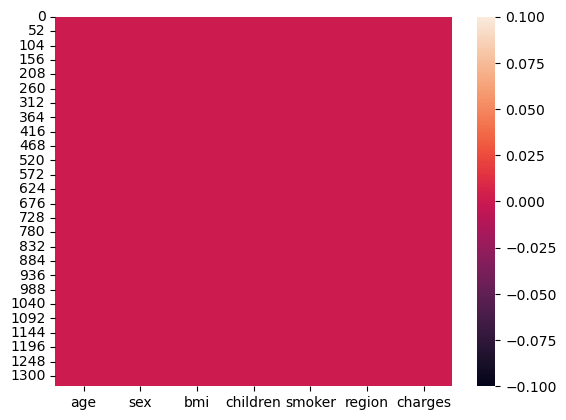

In [10]:
sns.heatmap(data.isnull())

There are no null values present in the dataset.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Here are a few more basic information of Dataset.
- Shape - 1337 rows 7 columns
- Missing values - 0
- Different type of Datatypes - 3 (float64(2), int64(2) & object(3))
- Range index - 0 to 1337(1338)
- Memory usage - 73.3 KB


In [12]:
summary_stats = data.describe()
summary_stats

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


These statistics provide a comprehensive overview of the dataset. Here's a description based on the provided statistics:

1) Data Completeness: The dataset is complete, containing no missing values for any of the features. This completeness simplifies data analysis.

2) Variablity: The standard deviation is used to measure the extent of data variation. In this dataset, "Charges" displays the highest variation, followed by "Age" and "BMI." Conversely, "Children" has lower variability due to its lower standard deviation.

>- Age: The ages in the dataset range from 18 to 64 years. The mean age is approximately 39 years, with a standard deviation of about 14, indicating moderate variability in age.

>- BMI (Body Mass Index): BMIs vary from 15.96 to 53.13, with an average BMI of approximately 30.66. The distribution appears relatively symmetrical as the mean and median (50th percentile) values are close.

>- Children: The number of children or dependents covered by health insurance ranges from 0 to 5. The average number of children is approximately 1.09, with a standard deviation of about 1.21, indicating some variability in this count.

>- Charges: Individual medical costs billed by health insurance vary widely, with values spanning from 1,121.87 to 63,770.43. The mean charge is approximately 13,270.42, and the standard deviation is approximately 12,110.01, highlighting a significant degree of variability in medical charges.

3) Skewness: Several features, such as "BMI" and "Charges," exhibit right-skewed distributions, implying a tendency toward higher values.

4) Outliers:

>- Features like "Charges" have high potential for outliers, with significantly higher maximum values compared to the 75th percentile.
>- Age and BMI have relatively symmetrical distributions with no strong indications of outliers.
>- The "Children" feature has a moderate potential for outliers but is generally well-distributed.

In [13]:
# Checking For Unique values and White Spaces
for i in data.columns:
    print(data[i].value_counts())
    print("\n")

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

In [14]:
data.nunique().to_frame('Number of Unique values in the Dataset:')

,Number of Unique values in the Dataset:
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


There is no whitespace in the dataset.
It displays the Unique values and  their respective number of occurrences in all columns of the Dataset.

In [15]:
data.duplicated().sum()

1

Their are multiple duplicate entries in the dataset but considering them as an individual feedback from customer which are same we will not drop it.

##  Exploratory Data Analysis(EDA)

In [16]:
# Converting Categorical Features to Numerical
converted_data = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1},
                   'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }
data_copy = data.copy()
data_copy.replace(converted_data, inplace=True)

In [18]:
# Checking wheather the values are changed to int64
print(data['sex'].value_counts().sort_values()) 
print(data['smoker'].value_counts().sort_values())
print(data['region'].value_counts().sort_values())

female    662
male      676
Name: sex, dtype: int64
yes     274
no     1064
Name: smoker, dtype: int64
northeast    324
southwest    325
northwest    325
southeast    364
Name: region, dtype: int64


Here we can see that categorical columns are converted to integers and no missing values are present, we can now proceed for in-depth analysis and modeling.

In [17]:
data_copy.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.514948,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.105572,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


Here's a description of the statistics for the provided dataset:

1) Age:
>- Data Completeness: There are no missing values for age, indicating a complete dataset.
>- Skewness: The age distribution appears to be relatively symmetrical.
>- Outliers: The age data has no potential for outliers, as the maximum age matches the 75th percentile.
>- Data Variability: The age data has a standard deviation of approximately 14.05, suggesting some variability, but most ages are   concentrated around the mean age of 39.21.

2) Sex:
>- Data Completeness: There are no missing values for gender (0 representing female, and 1 representing male).
>- Skewness: There is an approximately equal distribution between males and females.
>- Outliers: Gender data has no potential for outliers.
>- Data Variability: Gender is a categorical variable with low variability.

3) BMI (Body Mass Index):
>- Data Completeness: There are no missing values for BMI.
>- Skewness: BMI data is right-skewed, indicating a tendency toward higher values.
>- Outliers: BMI has a high potential for outliers, with significantly higher maximum values compared to the 75th percentile.
>- Data Variability: BMI data has a standard deviation of approximately 6.10, suggesting a considerable spread of data points.

4) Children:
>- Data Completeness: There are no missing values for the number of children or dependents.
>- Skewness: The number of children is right-skewed, indicating a tendency toward higher values.
>- Outliers: The "Children" feature has medium potential for outliers.
>- Data Variability: The standard deviation is approximately 1.21, indicating some variability in this count.

5) Smoker:
>- Data Completeness: There are no missing values for the smoking status (0 representing non-smoker, and 1 representing smoker).
>- Skewness: There is an unequal distribution between smokers and non-smokers, with more non-smokers.
>- Outliers: Smoking status has no potential for outliers.
>- Data Variability: Smoking status is a categorical variable with low variability.

6) Region:
>- Data Completeness: There are no missing values for the region (categorical feature).
>- Skewness: The dataset contains individuals from different regions in the U.S.
>- Outliers: Region data has no potential for outliers.
>- Data Variability: Region is a categorical variable with low variability.

7) Charges:
>- Data Completeness: There are no missing values for insurance charges.
>- Skewness: The insurance charges data is right-skewed, indicating a tendency toward higher charges.
>- Outliers: Charges have high potential for outliers with significantly higher maximum values compared to the 75th percentile.
>- Data Variability: Insurance charges have a standard deviation of approximately 12,110.01, indicating substantial variability     among charges.

               age       sex       bmi  children    smoker    region   charges
age       1.000000  0.020856  0.109272  0.042469 -0.025019  0.003243  0.299008
sex       0.020856  1.000000 -0.046371 -0.017163 -0.076185 -0.007974 -0.057292
bmi       0.109272 -0.046371  1.000000  0.012759  0.003750  0.156686  0.198341
children  0.042469 -0.017163  0.012759  1.000000  0.007673 -0.001907  0.067998
smoker   -0.025019 -0.076185  0.003750  0.007673  1.000000  0.013246  0.787251
region    0.003243 -0.007974  0.156686 -0.001907  0.013246  1.000000  0.011741
charges   0.299008 -0.057292  0.198341  0.067998  0.787251  0.011741  1.000000


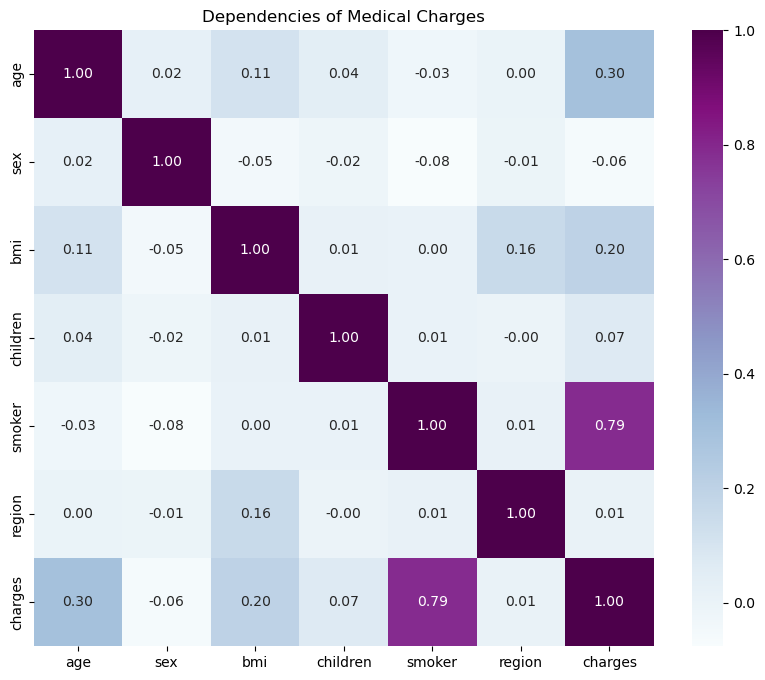

In [19]:
corr = data_copy.corr()
print(corr)

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap='BuPu', annot=True, fmt=".2f", ax=ax)
plt.title("Dependencies of Medical Charges")
plt.savefig('./sampleImages')
plt.show()

The analysis of the correlation matrix suggests that the "__Smoker__", "__BMI__," and "__Age__" variables have the highest correlations with "Charges," indicating that they are the most important factors in determining medical charges. On the other hand, "Sex," "Children," and "Region" appear to have weaker correlations with "Charges," suggesting that they may not significantly affect medical charges. We might drop these three columns from the analysis, as their impact on charges are less.

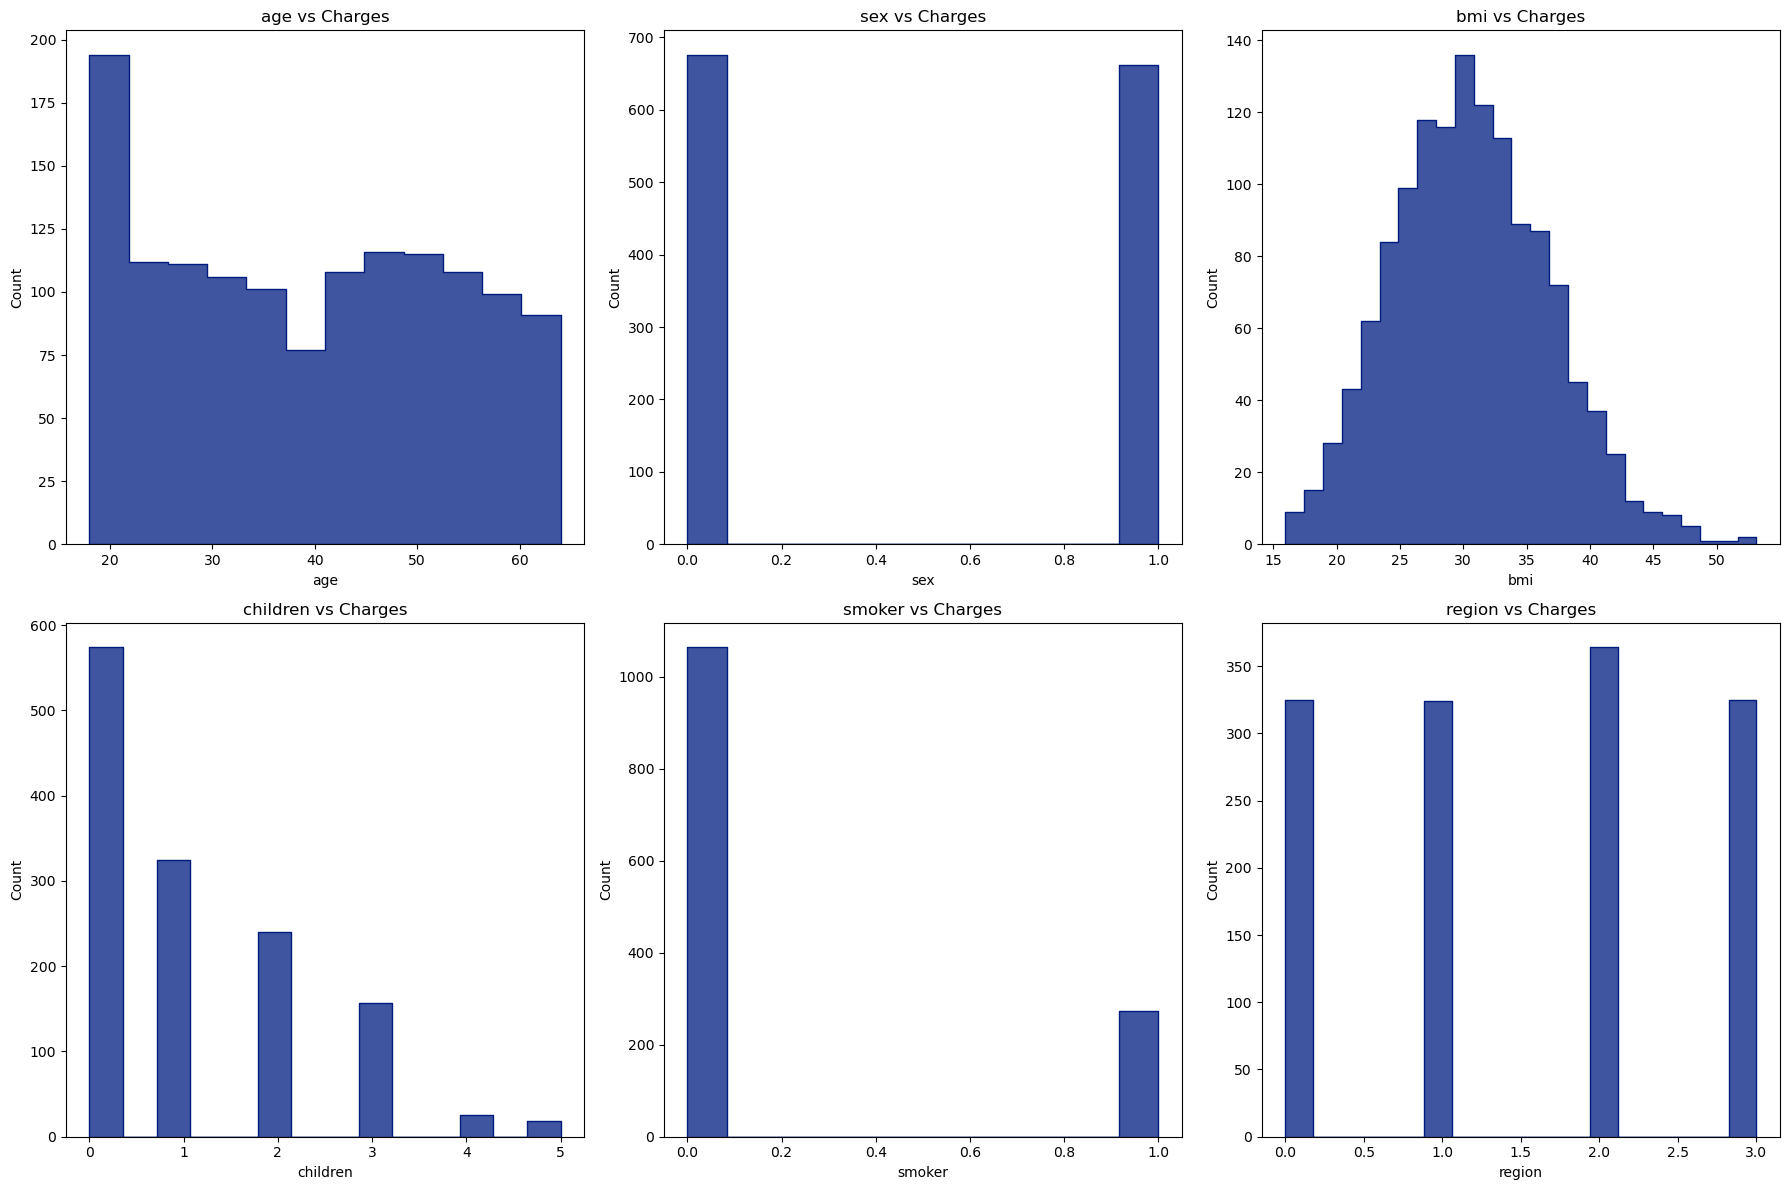

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = [col for col in data_copy.columns if col != 'charges']
sns.set_palette("dark")

plt.figure(figsize=(18, 12))
for i, column in enumerate(numerical_columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data=data_copy, x=column, element="step", common_norm=False, kde=False)
    plt.title(f'{column} vs Charges')

plt.tight_layout()
plt.show()

- __Age:__
The 'age' distribution is nearly symmetric (skewness close to 0) and has a platykurtic shape (kurtosis less than 3), meaning it has lighter tails compared to a normal distribution.
- __Sex:__
The 'sex' column is categorical, so skewness and kurtosis may not provide meaningful insights in this context.- 
- __BMI:__
The 'bmi' distribution is slightly positively skewed (skewness > 0) and has a mesokurtic shape (kurtosis close to 3), suggesting that it approximates a normal distribution.
- __Children:__
The 'children' column is positively skewed, indicating that there may be more individuals with fewer children, and it has a leptokurtic shape (kurtosis > 3), which suggests heavier tails compared to a normal distribution.
- __Smoker:__
The 'smoker' column is positively skewed, indicating that there may be more non-smokers, and it has a platykurtic shape, suggesting lighter tails.
- __Region:__
The 'region' column is categorical, so skewness and kurtosis may not provide meaningful insights in this context.
- __Charges:__
The 'charges' distribution is positively skewed, indicating that there may be higher medical charges for some individuals, and it has a leptokurtic shape, meaning it has heavier tails compared to a normal distribution.

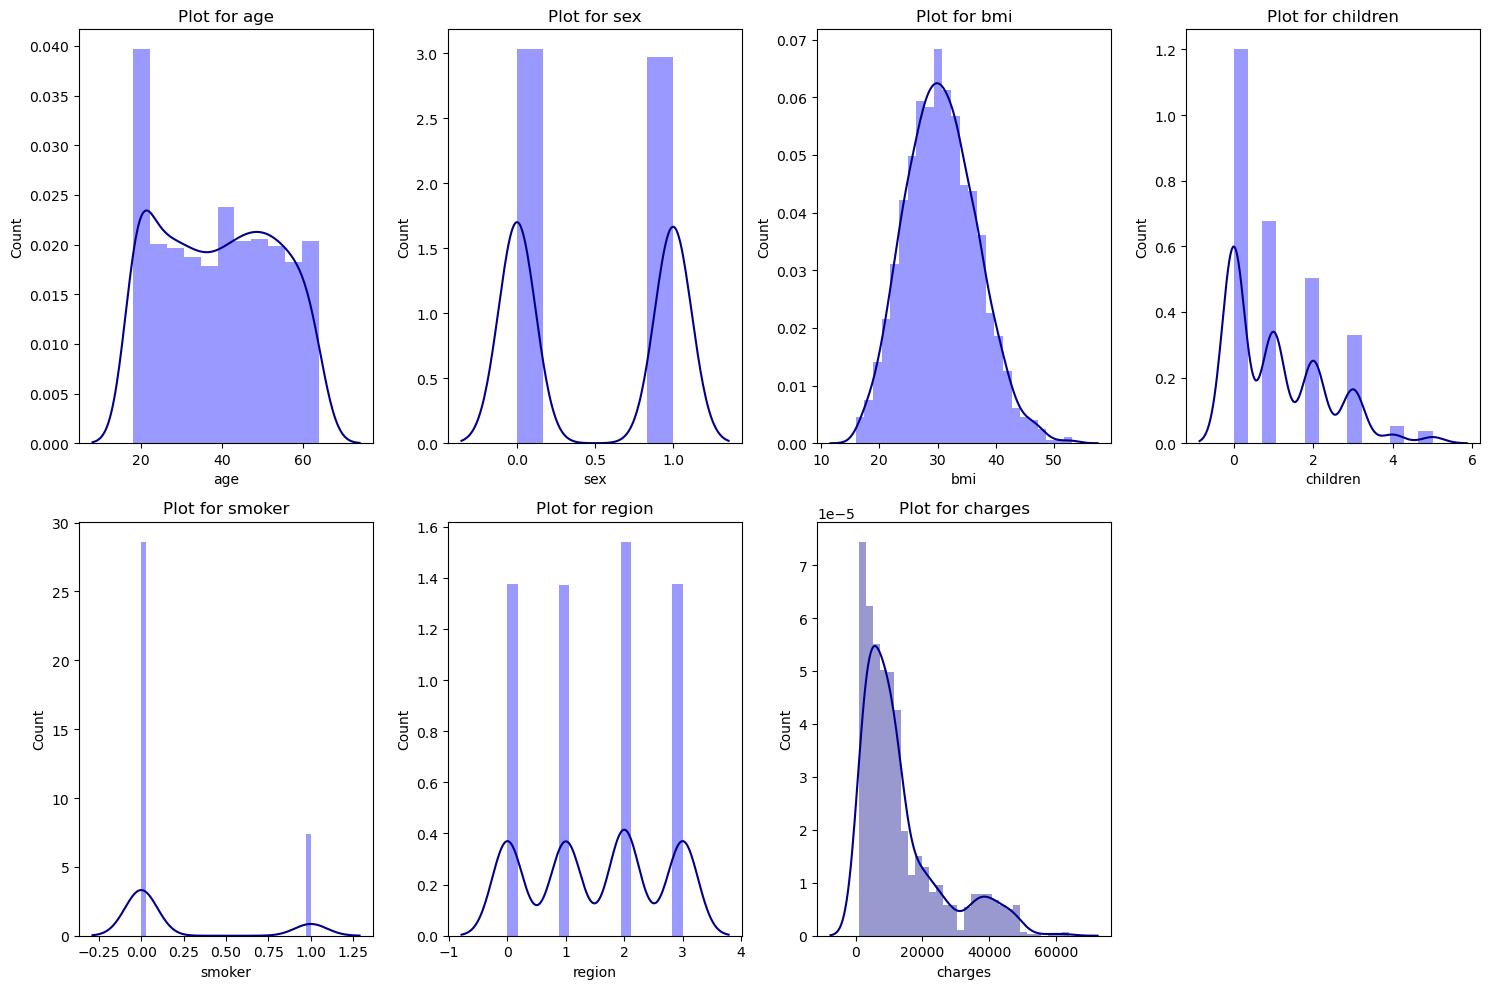

In [21]:
# Let's visualize the distribution of all the features
plt.figure(figsize=(15, 10))
for i, column in enumerate(data_copy.columns):
    plt.subplot(2, 4, i + 1)
    if column == 'charges':
        sns.distplot(data_copy[column], color='darkblue')
    else:
        sns.distplot(data_copy[column], color='purple', hist_kws={'color': 'blue'}, kde_kws={'color': 'darkblue'})
    plt.title(f'Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

Here in we can see Charges column may have the outliers but medical charges vary significantly based on the nature of medical treatments. Extraordinary costs might not necessarily indicate outliers, they could be due to specialized or rare medical conditions. Thus, a cautious approach is needed to avoid misinterpretation.

## Machine Learning

In [22]:
# lets scale BMI, Age and Charges using standard scaler for better prediction (other cant be scaled as they are categorical)
from sklearn.preprocessing import StandardScaler

data_pre = data_copy.copy()

data_pre['bmi'] = StandardScaler().fit_transform(data_pre['bmi'].values.reshape(-1, 1))
data_pre['age'] = StandardScaler().fit_transform(data_pre['age'].values.reshape(-1, 1))
data_pre['charges'] = StandardScaler().fit_transform(data_pre['charges'].values.reshape(-1, 1))

data_pre.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,1,-0.453320,0,1,3,0.298584
1,-1.509965,0,0.509621,1,0,2,-0.953689
2,-0.797954,0,0.383307,3,0,2,-0.728675
3,-0.441948,0,-1.305531,0,0,0,0.719843
4,-0.513149,0,-0.292556,0,0,0,-0.776802


In [23]:
# lets split the data into train and test
X = data_pre.drop('charges',axis=1).values
y = data_pre['charges'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (1070, 6)
Size of y_train :  (1070, 1)
Size of X_test :  (268, 6)
Size of Y_test :  (268, 1)


As we can see data is scaled ,Now we can proceed further with ML.

### Linear Regression

In [24]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [25]:
from sklearn.model_selection import cross_val_score
cv_lin_reg = cross_val_score(lin_reg, X, y, cv=10)
y_pred_lin_reg_train = lin_reg.predict(X_train)
y_pred_lin_reg_test = lin_reg.predict(X_test)

# Calculating R-squared scores
r2_score_lin_reg_train = r2_score(y_train, y_pred_lin_reg_train)
r2_score_lin_reg_test = r2_score(y_test, y_pred_lin_reg_test)

# Calculating RMSE
rmse_lin_reg = np.sqrt(mean_squared_error(y_test, y_pred_lin_reg_test))

print('CV Linear Regression (R2): {:.3f}'.format(cv_lin_reg.mean()))
print('R2 score (train): {:.3f}'.format(r2_score_lin_reg_train))
print('R2 score (test): {:.3f}'.format(r2_score_lin_reg_test))
print('RMSE: {:.3f}'.format(rmse_lin_reg))

CV Linear Regression (R2): 0.745
R2 score (train): 0.741
R2 score (test): 0.783
RMSE: 0.480


### Gradient Boosting Regression

In [26]:
grad_boost_reg = GradientBoostingRegressor()

# Perform 10-fold cross-validation
cv_gd = cross_val_score(grad_boost_reg, X, y, cv=10)
grad_boost_reg.fit(X_train, y_train)
y_pred_gd_train = grad_boost_reg.predict(X_train)
y_pred_gd_test = grad_boost_reg.predict(X_test)

# Calculating R-squared scores
r2_score_gd_train = r2_score(y_train, y_pred_gd_train)
r2_score_gd_test = r2_score(y_test, y_pred_gd_test)

# Calculating RMSE
rmse_gd = np.sqrt(mean_squared_error(y_test, y_pred_gd_test))

print('CV Gradient Boosting (R2): {:.3f}'.format(cv_gd.mean()))
print('R2 score (train): {:.3f}'.format(r2_score_gd_train))
print('R2 score (test): {:.3f}'.format(r2_score_gd_test))
print('RMSE: {:.3f}'.format(rmse_gd))

CV Gradient Boosting (R2): 0.856
R2 score (train): 0.899
R2 score (test): 0.879
RMSE: 0.359


### Random Forest Regression

In [27]:
# Lets scale both train and test models first
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.transform(y_test)

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from tqdm import tqdm

reg_rf = RandomForestRegressor()

# First trying with a simpler parameter grid 
parameters = {
    'n_estimators': [100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'criterion': ['mse', 'mae', 'friedman_mse', 'poisson']
}

reg_rf_gscv = GridSearchCV(estimator=reg_rf, param_grid=parameters, cv=3, n_jobs=-1)
total_combinations = len(reg_rf_gscv.param_grid) * 3  

with tqdm(total=total_combinations) as pbar:
    def update_pbar(_):
        pbar.update(1)

    reg_rf_gscv.on_batch_end = update_pbar

    reg_rf_gscv.fit(X_train_scaled, y_train_scaled.ravel())

print("Best Score:", reg_rf_gscv.best_score_)
print("Best Estimator:", reg_rf_gscv.best_estimator_)

  0%|          | 0/18 [00:13<?, ?it/s]

Best Score: 0.8365327875028371
Best Estimator: RandomForestRegressor(criterion='friedman_mse', max_depth=10,
                      max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=4, n_estimators=200)


In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from tqdm import tqdm

reg_rf = RandomForestRegressor()
# Now, trying with a accurate parameter grid 
parameters = {
    'n_estimators': [600, 1000, 1200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [40, 50, 60],
    'min_samples_split': [5, 7, 9],
    'min_samples_leaf': [7, 10, 12],
    'criterion': ['mse', 'mae', 'friedman_mse', 'poisson']
}
reg_rf_gscv = GridSearchCV(estimator=reg_rf, param_grid=parameters, cv=3, n_jobs=-1)
total_combinations = len(reg_rf_gscv.param_grid) * 3  

with tqdm(total=total_combinations) as pbar:
    def update_pbar(_):
        pbar.update(1)

    reg_rf_gscv.on_batch_end = update_pbar

    reg_rf_gscv.fit(X_train_scaled, y_train_scaled.ravel())

print("Best Score:", reg_rf_gscv.best_score_)
print("Best Estimator:", reg_rf_gscv.best_estimator_)

  0%|          | 0/18 [04:07<?, ?it/s]

Best Score: 0.8144733606461116
Best Estimator: RandomForestRegressor(criterion='friedman_mse', max_depth=50,
                      max_features='log2', min_samples_leaf=7,
                      min_samples_split=5, n_estimators=1200)


In [35]:
rf_reg = RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                       n_estimators=1200)
rf_reg.fit(X_train_scaled, y_train_scaled.ravel())

RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                      n_estimators=1200)

In [36]:
cv_rf = reg_rf_gscv.best_score_

y_pred_rf_train = rf_reg.predict(X_train_scaled)
r2_score_rf_train = r2_score(y_train_scaled, y_pred_rf_train)

y_pred_rf_test = rf_reg.predict(X_test_scaled)
r2_score_rf_test = r2_score(y_test_scaled, y_pred_rf_test)

rmse_rf = np.sqrt(mean_squared_error(y_test_scaled, y_pred_rf_test))

print('CV : {0:.3f}'.format(cv_rf))
print('R2 score (train) : {0:.3f}'.format(r2_score_rf_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_rf_test))
print('RMSE : {0:.3f}'.format(rmse_rf))

CV : 0.814
R2 score (train) : 0.884
R2 score (test) : 0.878
RMSE : 0.362


### Ridge Regression

In [37]:
steps = [('scalar', StandardScaler()),
         ('poly', PolynomialFeatures(degree=2)),
         ('model', Ridge())]

ridge_pipe = Pipeline(steps)

parameters = {
    'model__alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 2, 5, 10, 20, 25, 35, 43, 55, 100],
    'model__random_state': [42]
}

reg_ridge = GridSearchCV(ridge_pipe, parameters, cv=10)
reg_ridge = reg_ridge.fit(X_train, y_train)

best_estimator = reg_ridge.best_estimator_
best_score = reg_ridge.best_score_

print("Best Estimator:", best_estimator)
print("Best Score:", best_score)

Best Estimator: Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Ridge(alpha=20, random_state=42))])
Best Score: 0.8259990140429394


In [38]:
ridge = Ridge(alpha=20, random_state=42)
ridge.fit(X_train_scaled, y_train_scaled.ravel())
cv_ridge = reg_ridge.best_score_  

y_pred_ridge_train = ridge.predict(X_train_scaled)
r2_score_ridge_train = r2_score(y_train_scaled, y_pred_ridge_train)

y_pred_ridge_test = ridge.predict(X_test_scaled)
r2_score_ridge_test = r2_score(y_test_scaled, y_pred_ridge_test)

rmse_ridge = (np.sqrt(mean_squared_error(y_test_scaled, y_pred_ridge_test)))
print('CV : {0:.3f}'.format(cv_ridge))
print('R2 score (train) : {0:.3f}'.format(r2_score_ridge_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_ridge_test))
print('RMSE : {0:.3f}'.format(rmse_ridge))

CV : 0.826
R2 score (train) : 0.741
R2 score (test) : 0.782
RMSE : 0.485


### Support Vector Machine Regression

In [39]:
svr = SVR()
svr.fit(X_train_scaled, y_train_scaled.ravel())

SVR()

In [40]:
parameters =  { 'kernel' : ['rbf', 'sigmoid'],
                 'gamma' : [0.001, 0.01, 0.1, 1, 'scale'],
                 'tol' : [0.0001],
                 'C': [0.001, 0.01, 0.1, 1, 10, 100] }
svr_grid = GridSearchCV(estimator=svr, param_grid=parameters, cv=10, verbose=4, n_jobs=-1)
svr_grid.fit(X_train_scaled, y_train_scaled.ravel())

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 'scale'],
                         'kernel': ['rbf', 'sigmoid'], 'tol': [0.0001]},
             verbose=4)

In [41]:
svr = SVR(C=10, gamma=0.1, tol=0.0001)
svr.fit(X_train_scaled, y_train_scaled.ravel())
print(svr_grid.best_estimator_)
print(svr_grid.best_score_)

SVR(C=10, gamma=0.1, tol=0.0001)
0.8311283388933969


In [42]:
cv_svr = svr_grid.best_score_

y_pred_svr_train = svr.predict(X_train_scaled)
r2_score_svr_train = r2_score(y_train_scaled, y_pred_svr_train)

y_pred_svr_test = svr.predict(X_test_scaled)
r2_score_svr_test = r2_score(y_test_scaled, y_pred_svr_test)

rmse_svr = np.sqrt(mean_squared_error(y_test_scaled, y_pred_svr_test))

print('CV: {0:.3f}'.format(cv_svr))
print('R2_score (train): {0:.3f}'.format(r2_score_svr_train))
print('R2_score (test): {0:.3f}'.format(r2_score_svr_test))
print('RMSE: {0:.3f}'.format(rmse_svr))

CV: 0.831
R2_score (train): 0.857
R2_score (test): 0.871
RMSE: 0.372


## Analysis 

In [45]:
models = [('Linear Regression', rmse_lin_reg, r2_score_lin_reg_train, r2_score_lin_reg_test, cv_lin_reg.mean()),
          ('Gradient Boosting Regression', rmse_gd, r2_score_gd_train, r2_score_gd_test, cv_gd.mean()),
          ('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_test, cv_rf),   
          ('Ridge Regression', rmse_ridge, r2_score_ridge_train, r2_score_ridge_test, cv_ridge),
          ('Support Vector Regression', rmse_svr, r2_score_svr_train, r2_score_svr_test, cv_svr)
         ]

In [46]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,0.479808,0.741410,0.782694,0.744528
1,Gradient Boosting Regression,0.358556,0.899151,0.878647,0.856235
2,Random Forest Regression,0.362148,0.884433,0.878069,0.814473
3,Ridge Regression,0.484693,0.741150,0.781590,0.825999
4,Support Vector Regression,0.372417,0.857236,0.871057,0.831128


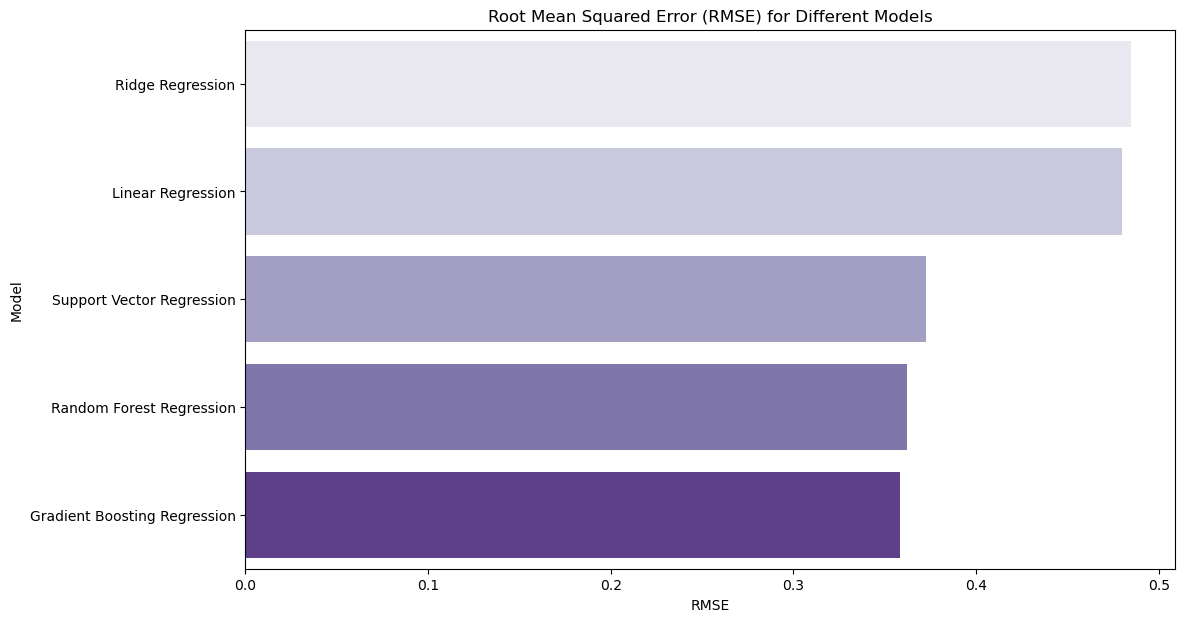

In [58]:
plt.figure(figsize=(12, 7))
predict.sort_values(by=['RMSE'], ascending=False, inplace=True)

sns.barplot(x='RMSE', y='Model', data=predict, palette='Purples')
plt.xlabel('RMSE')
plt.ylabel('Model')
plt.title('Root Mean Squared Error (RMSE) for Different Models')
plt.show()

Here we can see Gradient Boosting Regression has lowest RSME.

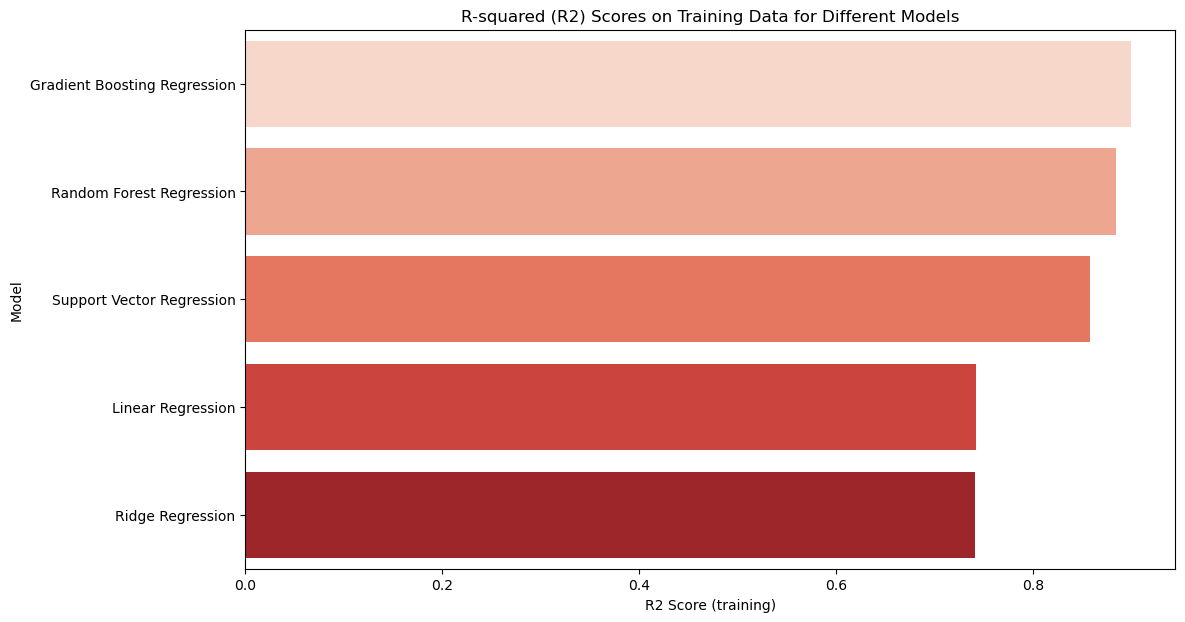

In [59]:
plt.figure(figsize=(12, 7))
predict.sort_values(by=['R2_Score(training)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(training)', y='Model', data=predict, palette='Reds')
plt.xlabel('R2 Score (training)')
plt.ylabel('Model')
plt.title('R-squared (R2) Scores on Training Data for Different Models')
plt.show()

Here we can see Gradient Boosting Regression has highest R2 score on Train Data.

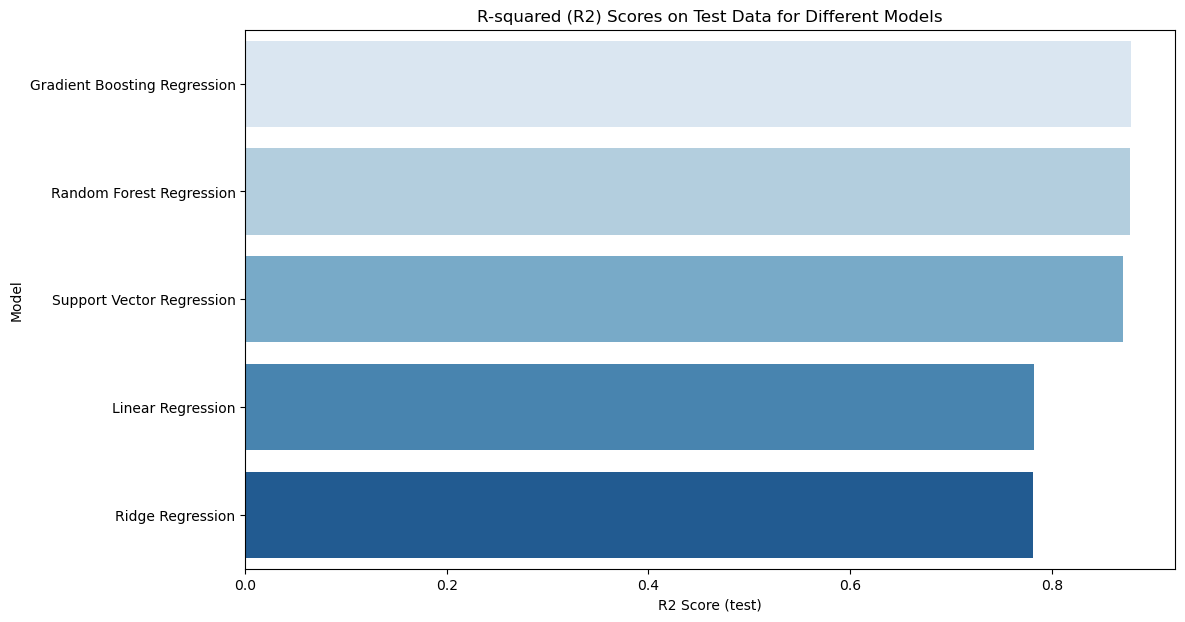

In [56]:
plt.figure(figsize=(12, 7))
predict.sort_values(by=['R2_Score(test)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(test)', y='Model', data=predict, palette='Blues')
plt.xlabel('R2 Score (test)')
plt.ylabel('Model')
plt.title('R-squared (R2) Scores on Test Data for Different Models')
plt.show()

Here we can see Gradient Boosting Regression has highest R2 score on Test Data.

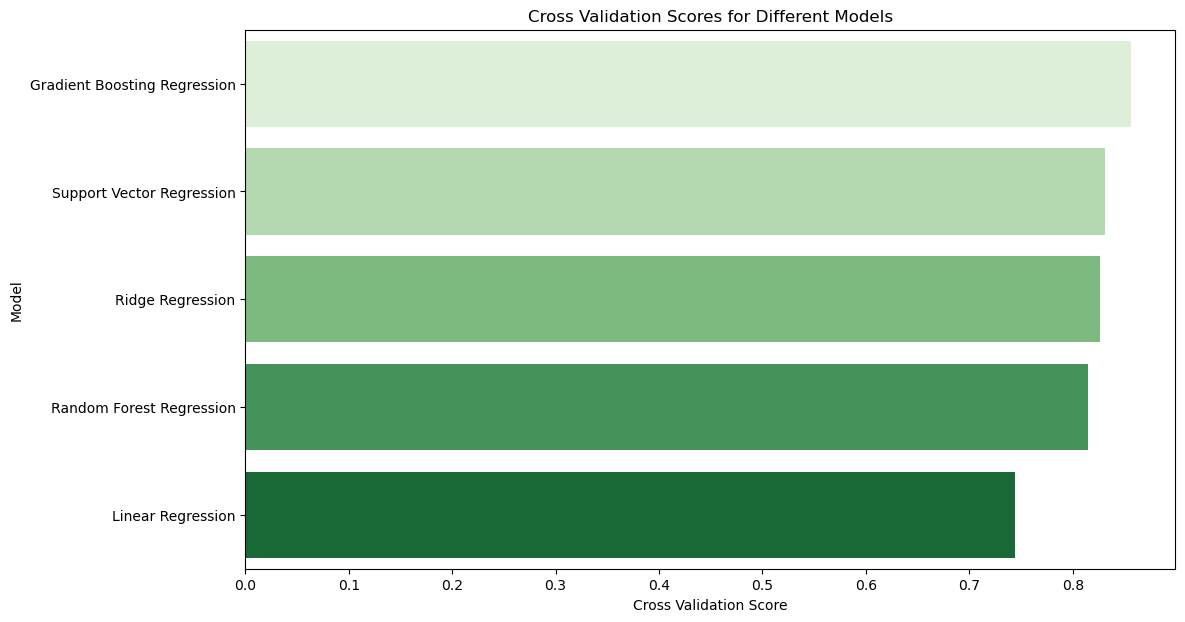

In [55]:
plt.figure(figsize=(12,7))
predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model',data = predict, palette='Greens')
plt.xlabel('Cross Validation Score')
plt.ylabel('Model')
plt.title('Cross Validation Scores for Different Models')
plt.show()

Here we can see Gradient Boosting Regression has highest Cv score.

# Conclusion

1) The analysis of the correlation matrix suggests that the "__Smoker__", "__BMI__," and "__Age__" variables have the highest correlations with "Charges," indicating that they are the most important factors in determining medical charges. On the other hand, "Sex," "Children," and "Region" appear to have weaker correlations with "Charges.
2) From the Analysis we can say , the Best modal to accurately predict insurance cost is the __Gradient Boosting Regression model.__
   >- This model demonstrated strong predictive capabilities with a low Root Mean Squared Error (RMSE) and high R-squared
   scores.
   >- Gradient Boosting's ensemble nature allows it to capture complex relationships within the data, providing accurate   
   estimates of insurance costs.  
   >- The model performs well in explaining the variance in insurance costs and generalizes effectively to unseen data.
   >- It is a reliable choice for estimating medical insurance expenses, which aligns with the project's primary objective.
3) In summary, Gradient Boosting Regression is a predictive model for medical insurance costs by leveraging various input features. It is crucial in the context of healthcare planning and cost estimation, which can benefit both insurance providers and individuals seeking healthcare coverage.   

## Thank-you!